# Tarea #2

1. Tomar de referencia la practica 1, tomar solo UNA de las bases de datos y aplicar los metodos de analisis inicial de datos para describir la base de datos (Las columnas, tipos de datos, etc.)

* Importamos las librerias necesarias para poder realizar la Preparacion de Datos de la BD

In [4]:
import numpy as np
import pandas as pd
import json
import seaborn as sn
import pandas_profiling 
import matplotlib.pyplot as plt

%matplotlib inline

* Importamos la BD que vamos a utilizar


In [5]:
df = pd.read_csv("winemag-data_first150k.csv")

Para esto vamos a utlizar la base de datos de los vinos que el cual puede ser interesante ya que tenemos datos de fierentes marcas, paises, ciudades, puntaje y podemos hacer diversas aplicaciones con esos datos

* Visualizamos la BD para ver si se cargo.

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Con este comprobamos que realmente se halla cargado o creado la DataFrame

In [4]:
df.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset
150929,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


Checamos que realmente los datos si se cargaron

* En este paso veremos los nombres de las columnas de nuestra BD 

In [64]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

* En este paso veremos que tipo de datos maneja nuestra BD

In [65]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

* Creamos una clasificacion que sea por pais y que solo sean seleccionados por Italia

In [66]:
clase_1 = df[df['country']=='Italy']

clase_1.to_csv('VinosItalianos.csv', index=False)

Vamos a trabajar creando una clase sepracion de datos con el pais de italia para despues crear una propia BD

* Visualizamos el resultado de clasificar todos los vinos que solo sean de Italia

In [32]:
italy = pd.read_csv("VinosItalianos.csv")

In [68]:
italy.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
1,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
2,35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
3,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
4,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia


In [69]:
italy.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
23473,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
23474,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
23475,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
23476,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
23477,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


* Cambiamos algunos nombres de las columnas de la BD

In [70]:
italy.rename(columns = {'price':'Precio','points':'Puntos','province':'Provincia','country':'Pais','designation':'Designacion','variety':'Variedad'})

,Unnamed: 0,Pais,description,Designacion,Puntos,Precio,Provincia,region_1,region_2,Variedad,winery
0,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
1,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
2,35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
3,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
4,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia
...,...,...,...,...,...,...,...,...,...,...,...
23473,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
23474,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
23475,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
23476,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora


* Guardar otros archivos con agrupaciones.

### Creacion de una nueva BD con datos de vinos de España e Italia

###### 2.Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

obtenemos datos estadisticos de la columna de precios de los vinos en general de todos los vinos italianos

#### Probando graficas con Italia para comparacion con España

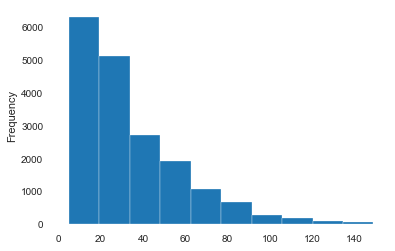

In [75]:
italy[italy['price']<150 ]['price'].plot.hist()

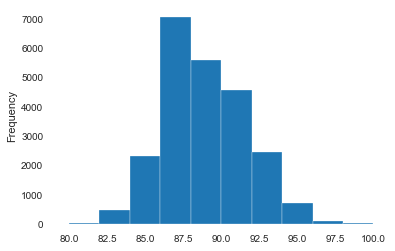

In [76]:
italy['points'].plot.hist()

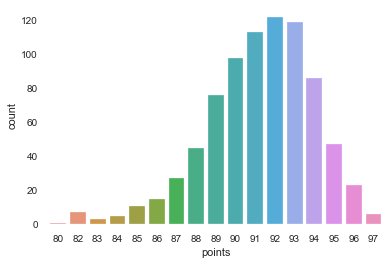

In [77]:
sn.countplot(preciosItalia['points'])

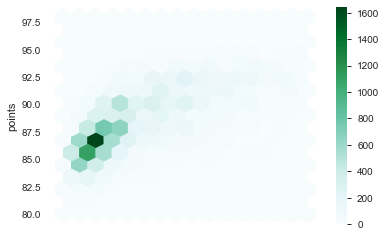

In [10]:
italy[italy['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15) 

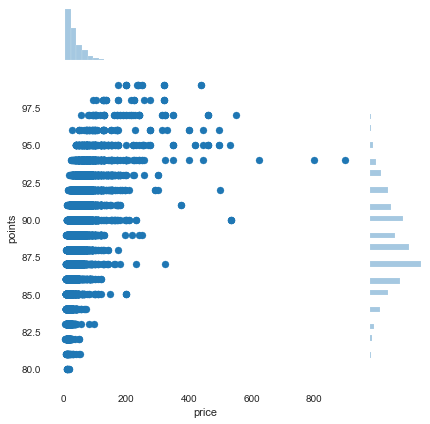

In [12]:
sn.jointplot(x='price', y='points', data=italy[italy['points'] < 100])

In [30]:
vesp = pd.read_csv("VinosEspaña.csv")
vesp.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
1,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
2,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
3,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero


Con este aqui vamos a checar que al crear nuestra seleccion se hallan hecho solo los de España

Creamos la clase con seleccion del pais España para obtener informacion los vinos.

In [80]:
claseUS = df[df['country']=='US']

claseUS.to_csv('VinosUS.csv', index=False)
vUS = pd.read_csv("VinosUS.csv")
vUS.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
2,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
3,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
4,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


Checamos que se hallan creado con todas la categoria de pais Estados Unidos

Creamos la clase con seleccion del pais Estados Unidos para obtener informacion los vinos.

In [81]:
claseArg = df[df['country']=='Argentina']

claseArg.to_csv('VinosArg.csv', index=False)
vArg = pd.read_csv("VinosArg.csv")
vArg.head()




,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,60,Argentina,"Concentrated, ripe blackberry and cassis aroma...",The Apple Doesn't Fall Far From The Tree,91,30.0,Mendoza Province,Mendoza,NaN,Malbec,Matias Riccitelli
1,62,Argentina,Smoky aromas of fresh-cut wood blend with berr...,Alegoría Gran Reserva,91,25.0,Mendoza Province,Mendoza,NaN,Malbec,Navarro Correas
2,111,Argentina,This copper-tinted rosé of Pinot Noir smells l...,Terroir Único Pinot Noir,86,12.0,Mendoza Province,Tupungato,NaN,Rosé,Zorzal
3,115,Argentina,"Aromas of prune, raisin and black plum are ful...",Reserva,86,15.0,Mendoza Province,Valle de Uco,NaN,Malbec,Viñalba
4,184,Argentina,"Dark, minty, inky aromas of blackberry are rug...",Trinità Grand Reserve,88,26.0,Mendoza Province,Luján de Cuyo,NaN,Bordeaux-style Red Blend,Piattelli


Creamos la clase con seleccion del pais Argentina para obtener informacion los vinos.

In [82]:
clasePortugal = df[df['country']=='Portugal']

clasePortugal.to_csv('VinosPortugal.csv', index=False)
vPort = pd.read_csv("VinosPortugal.csv")
vPort.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,64,Portugal,"This is a super-ripe, still very young wine. I...",NaN,91,23.0,Alentejano,NaN,NaN,Portuguese Red,Herdade do Rocim
1,74,Portugal,It is the ripe dark Alicante Bouschet that dom...,Premium,91,15.0,Alentejo,NaN,NaN,Portuguese Red,Adega Cooperativa de Borba
2,91,Portugal,"The local Baga grape, better known for produci...",Marquês de Marialva Rosé Bruto,86,12.0,Beira Atlantico,NaN,NaN,Baga,Adega de Cantanhede
3,94,Portugal,This family-owned estate has produced an immed...,Muros de Vinha,86,10.0,Douro,NaN,NaN,Portuguese Red,Quinta do Portal
4,110,Portugal,This state-owned estate of forests and vineyar...,Companhia das Lezírias Herdade de Catapereiro ...,86,12.0,Tejo,NaN,NaN,Portuguese Red,Wines & Winemakers


Creamos la clase con seleccion del pais Portugal para obtener informacion los vinos.

###### 3.Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

### Analisis de España contra Italia

In [3]:
vesp['points'].plot.hist()

NameError: name 'vesp' is not defined

Grafica de puntos totales de tabla de vinos España, esto a comparacion de Italia, España tiene mas vinos con calificaciones de 80-90, ya que Italia tiene mayor puntaje en vinos que en españa si se mejorara una produccion o mejorar la venta en regiones especificas España podria ganar mayor mercado.

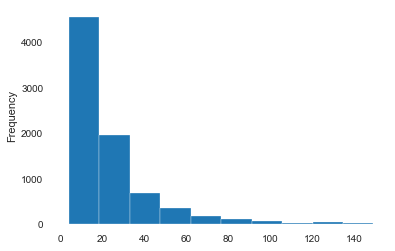

In [7]:
pais[pais['price']<150 ]['price'].plot.hist()

Los precios de España a comparacion de Italia son mas baratos, pero a la vez a comparar un vino y su puntaje puede diferir calidad o la variedad de productos que estos puedan estar en una region, lo que España debe de buscar mayor expansion a otras regiones, con precios bajos, y el mercado puede aumentar asi como el puntaje.

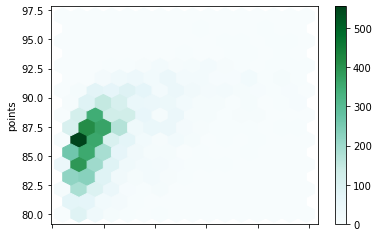

In [17]:
pais[pais['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15) 

En esta grafica asociamos el precio con los puntos de los vinos de España, esto a comparacion de Italia caso tienen un punto verde fuerte en el mismo puntaje pero al tener mayor cantidad de vinos la cantidad de comparaciones entre los vinos de Italia y España es baja, a pesar de que se venden en diferentes partes del mundo genera mayor distribucion de ventas Italia.

### Seleccionamos datos de España y de Italia para realizar graficas y ver sus datos juntos
Nos interesa y llama la atencion tener datos de España y de Italia por lo que vamos a analizar estos datos

In [33]:
pais = [vesp,italy]

Creamos una variable de tipo lista el cual tiene 2 DataFrame el cual con este comando se van a concatenar para despues generar un DataFrame

In [36]:
pais = pd.concat([vesp,italy])

Con este vamos a concatenar las dos DataFrame para el cual usamos concat y se guarda en una variable para despues hacerla un nuevo DataFrame con toCsv

In [38]:
pais.to_csv('Vinosdepais.csv', index=False)

In [24]:
pais = pd.read_csv("Vinosdepais.csv")

Hacemos nuestro DataFrame

In [11]:
pais.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
1,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
2,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
3,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero


In [ ]:
Checamos que realmente se realizo la carga de los datos de la nueva DataFrame

In [12]:
pais.tail()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
31741,150920,Italy,"Rich and mature aromas of smoke, earth and her...",Brut Riserva,91,19.0,Northeastern Italy,Trento,NaN,Champagne Blend,Letrari
31742,150922,Italy,Made by 30-ish Roberta Borghese high above Man...,Superiore,91,NaN,Northeastern Italy,Colli Orientali del Friuli,NaN,Tocai,Ronchi di Manzano
31743,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
31744,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
31745,150929,Italy,More Pinot Grigios should taste like this. A r...,NaN,90,15.0,Northeastern Italy,Alto Adige,NaN,Pinot Grigio,Alois Lageder


In [13]:
pais.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2       float64
variety         object
winery          object
dtype: object

In [ ]:
Revisamos que tipos de datos tiene nuestra nueva DataFrame 

In [23]:
pais = pais.dropna()

Eliminamos los datos vacios NaN

Comprobamos que realmente se cargaron que se hallan cargado tambien datos de italia en nuestra nueva Dataframe

C:\Users\Franc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Franc\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


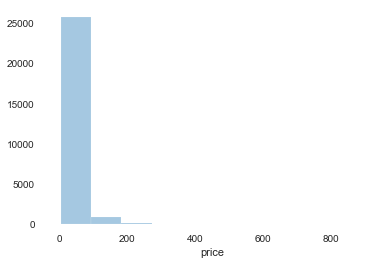

In [32]:


sn.distplot(pais['price'], bins=10, kde=False)

Con este Histograma podemos observar que el precio de los vinos en italia y en España la mayoria son vinos que son en un rango de maximo 100 dolares-euros, el cual a los 200 son aproximadamente 1000 vinos y mayores a 200 son minima de 100 por lo que existen vinos que pueden hacer competencia debido a precio bajo y puedan tener una mejor aceptabilidad por los clientes

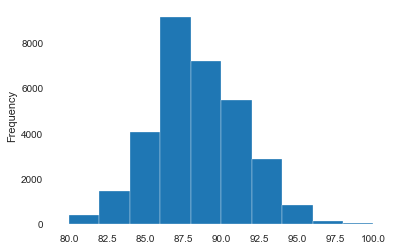

In [28]:
pais[pais['points']<150 ]['points'].plot.hist()

vemos que a pesar de que tienen vinos de menor precio, tinen vinos de precio barato todos tienen puntuacion de 87.5 lo cual se demuestra que es el mayor promedio de los vinos y el siguiente rango es 90 lo cual un puntaje mas alto son muy pocos 

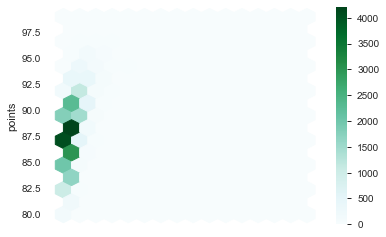

In [29]:
pais[pais['points'] < 100].plot.hexbin(x='price', y='points', gridsize=15) 

Aqui vemos mas claramente que con distribucion puntaje , precio podemos observar que claramente en 87.5 es el puntaje tipico o promedio de un vino que es de estos dos paises

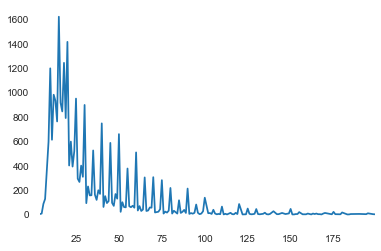

In [33]:

pais[pais['price'] < 200]['price'].value_counts().sort_index().plot.line()

y aqui vemos de mejor y una vista mas amplia la lista de los precios se puede decir que un promedio de 20 dolares-euroes se cumple ya que se ve claramente que tiene mayor venta los de ese rango de precio.
pero como se ha visto es que no por vender muchos vinos significa que van a tener un puntaje alto, sino esto va mas a la calidad como Toro Rosso, Tempranillo, etc, esto va a diferir de la calidad y de la cantidad de ventas por region.
